In [76]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv("assignment_dataset.csv")
len(df)

129971

In [72]:
df[df.isnull().any(axis=1)] #rows where NAN present 

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",NaN,Nicosia,Kerin O’Keefe,87
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",14.0,Rainstorm,Paul Gregutt,87
7,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,NaN,France,Alsace,This dry and restrained wine offers spice in p...,24.0,Trimbach,Roger Voss,87
11,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,NaN,France,Alsace,"This is a dry wine, very spicy, with a tight, ...",30.0,Leon Beyer,Roger Voss,87
12,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,NaN,US,California,"Slightly reduced, this wine offers a chalky, t...",34.0,Louis M. Martini,Virginie Boone,87
...,...,...,...,...,...,...,...,...,...,...
129955,Dog Point 2012 Chardonnay (Marlborough),Chardonnay,NaN,New Zealand,Marlborough,"Like Dog Point's 2011 Chardonnay, this wine is...",40.0,Dog Point,Joe Czerwinski,90
129961,COS 2013 Frappato (Sicilia),Frappato,NaN,Italy,Sicily & Sardinia,"Intense aromas of wild cherry, baking spice, t...",30.0,COS,Kerin O’Keefe,90
129964,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Saint-Rémy Herrenweg,France,Alsace,"Initially quite muted, this wine slowly develo...",NaN,Domaine Ehrhart,Roger Voss,90
129967,Citation 2004 Pinot Noir (Oregon),Pinot Noir,NaN,US,Oregon,Citation is given as much as a decade of bottl...,75.0,Citation,Paul Gregutt,90


In [73]:
df.columns[df.isna().any()].tolist() #find columns which has NaN

['variety', 'designation', 'country', 'province', 'price', 'taster_name']

In [90]:
list_of_col=df.columns
y=[]
u=[]
for l in list_of_col:
    y.append(len(df[df[l].isnull()]))
    u.append(len(df[l].unique()))

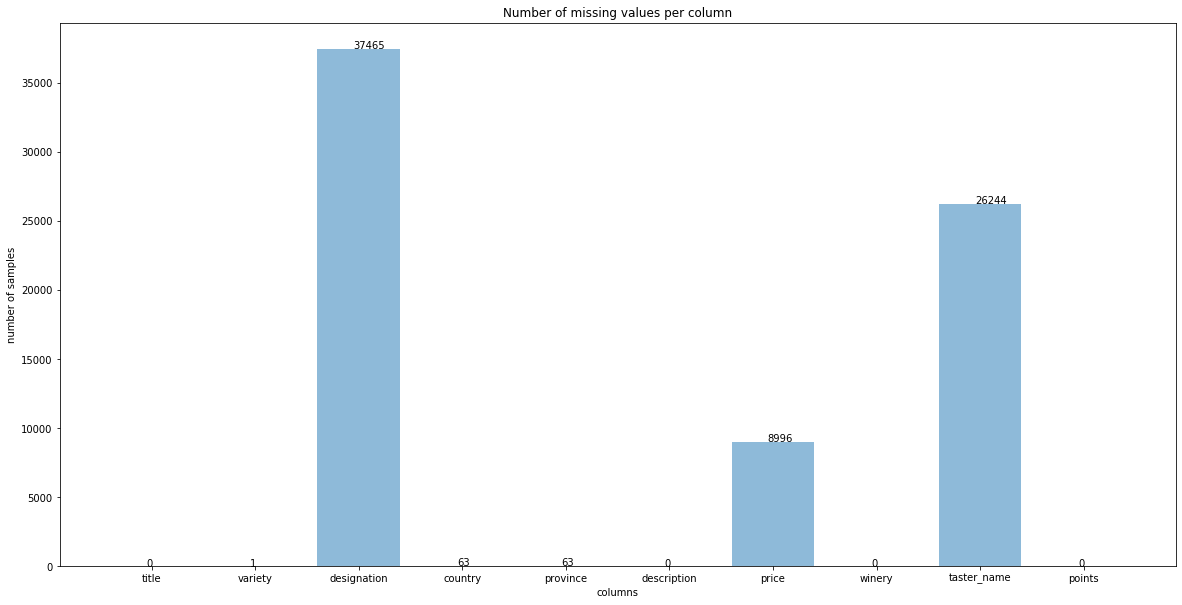

In [86]:
y_pos = np.arange(len(list_of_col))
plt.figure(figsize=(20,10))
plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, list_of_col)
plt.ylabel('number of samples')
plt.xlabel('columns')
plt.title('Number of missing values per column')
for i, v in enumerate(y):
    plt.text(y_pos[i] - 0.05, v + 0.05, str(v))
plt.show()

In [23]:
df[df['variety'].isnull()] #row where variety is missing
df = df[df['variety'].notna()] #revoing the row where variety is NaN

In [24]:
df.designation.fillna(df.province, inplace=True) #replace designation with province replace with unknown
df[df['designation'].isnull()] #find remaining row with designation NaN
df=df[df['designation'].notna()] #removing nan

In [25]:
print(len(df[df['country'].isnull()])) #rows where country 
df=df[df['country'].notna()]


52


In [26]:
print(len(df[df['province'].isnull()])) 

0


In [27]:
print(len(df[df['price'].isnull()]))
price_not_present=df[df['price'].isnull()]
d_p=df[df['price'].notna()]#removing the data where price is not present 
len(d_p)

8992


120915

In [28]:
d_p[d_p['taster_name'].isnull()]  #rows where tester name is missing
# len(df.taster_name.unique())

,title,variety,designation,country,province,description,price,winery,taster_name,points
33,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Puma Springs Vineyard,US,California,"Rustic and dry, this has flavors of berries, c...",50.0,Envolve,NaN,86
34,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,California,US,California,"This shows a tart, green gooseberry flavor tha...",20.0,Envolve,NaN,86
37,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Missoni,Italy,Sicily & Sardinia,This concentrated Cabernet offers aromas of cu...,21.0,Feudi del Pisciotto,NaN,86
38,Feudi di San Marzano 2011 I Tratturi Primitivo...,Primitivo,I Tratturi,Italy,Southern Italy,"Inky in color, this wine has plump aromas of r...",11.0,Feudi di San Marzano,NaN,86
39,Feudo di Santa Tresa 2011 Purato Made With Org...,Nero d'Avola,Purato Made With Organic Grapes,Italy,Sicily & Sardinia,"Part of the natural wine movement, this wine i...",12.0,Feudo di Santa Tresa,NaN,86
...,...,...,...,...,...,...,...,...,...,...
129852,MandraRossa 2006 Cabernet Sauvignon-Shiraz (Si...,Cabernet Sauvignon-Shiraz,Sicily & Sardinia,Italy,Sicily & Sardinia,Here's an easy blend of Cabernet Sauvignon and...,10.0,MandraRossa,NaN,86
129914,Fritz 2005 Cabernet Sauvignon (Dry Creek Valley),Cabernet Sauvignon,California,US,California,Fritz has made tremendous progress with Cab ov...,35.0,Fritz,NaN,91
129920,Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Fiddlestix Vineyard,US,California,"Shows the clean, citrus acid juiciness and sil...",48.0,Pali,NaN,91
129929,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Veneto,Italy,Veneto,"This luminous sparkler has a sweet, fruit-forw...",38.0,Col Vetoraz Spumanti,NaN,91


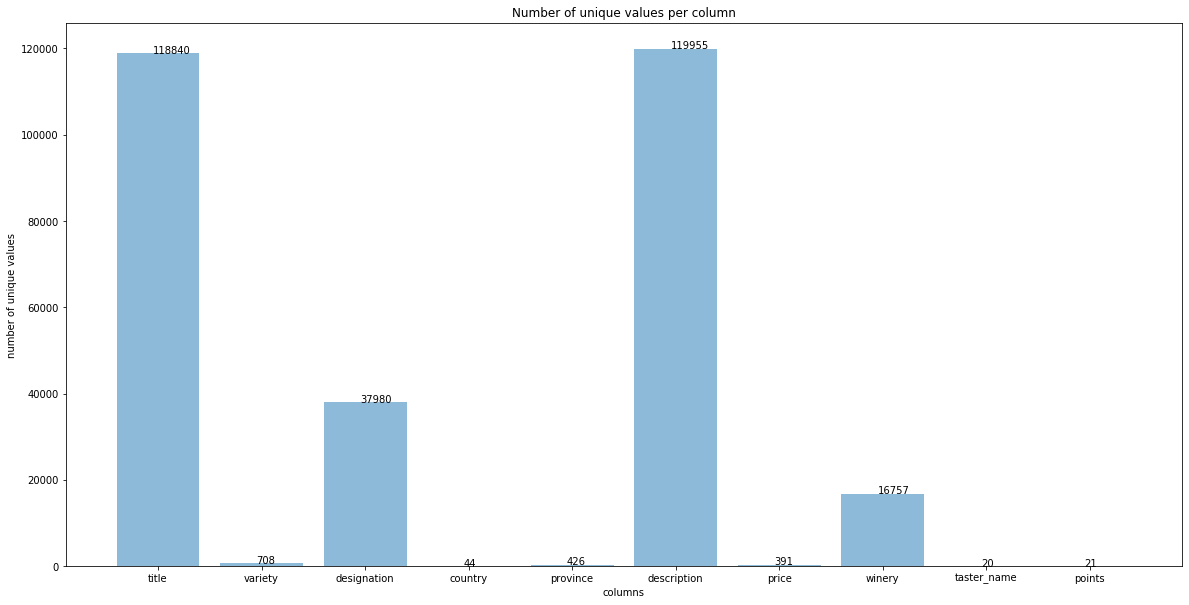

In [96]:
#lowercase everything
d_l = d_p.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
u=[]
for l in list_of_col:
    u.append(len(df[l].unique()))
u_pos = np.arange(len(list_of_col))
plt.figure(figsize=(20,10))
plt.bar(u_pos, u, align='center', alpha=0.5)
plt.xticks(u_pos, list_of_col)
plt.ylabel('number of unique values')
plt.xlabel('columns')
plt.title('Number of unique values per column')
for i, v in enumerate(u):
    plt.text(u_pos[i] - 0.05, v + 0.05, str(v))
plt.show()

In [93]:
print(d_l.columns[d_l.isna().any()].tolist())#find columns which has NaN
d_l.reset_index(drop=True, inplace=True)

['taster_name']


In [31]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res=dummies
#     res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)
varieties=encode_and_bind(d_l,'variety')
countries=encode_and_bind(d_l, 'country')
proviences=encode_and_bind(d_l, 'province')
# wineries=encode_and_bind(d_l,'winery')


In [47]:
p = d_l['points']/100 #scaling 

In [48]:
x=pd.concat([p,countries, proviences, varieties], axis=1, ignore_index=True)
y=d_l['price'].values.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
reg=linear_model.LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.2635141580609417

In [ ]:
bes = linear_model.BayesianRidge(compute_score=True)
bes.fit(X_train, y_train)

In [64]:
regr = RandomForestRegressor(n_estimators=1000,max_depth=500, random_state=0)
regr.fit(X_train, y_train)

C:\Users\ARNAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: 

In [ ]:
regr.score(X_train,y_train)

In [66]:
d_l

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,quinta dos avidagos 2011 avidagos red (douro),portuguese red,avidagos,portugal,douro,"this is ripe and fruity, a wine that is smooth...",15.0,quinta dos avidagos,roger voss,87
1,rainstorm 2013 pinot gris (willamette valley),pinot gris,oregon,us,oregon,"tart and snappy, the flavors of lime flesh and...",14.0,rainstorm,paul gregutt,87
2,st. julian 2013 reserve late harvest riesling ...,riesling,reserve late harvest,us,michigan,"pineapple rind, lemon pith and orange blossom ...",13.0,st. julian,alexander peartree,87
3,sweet cheeks 2012 vintner's reserve wild child...,pinot noir,vintner's reserve wild child block,us,oregon,"much like the regular bottling from 2012, this...",65.0,sweet cheeks,paul gregutt,87
4,tandem 2011 ars in vitro tempranillo-merlot (n...,tempranillo-merlot,ars in vitro,spain,northern spain,blackberry and raspberry aromas show a typical...,15.0,tandem,michael schachner,87
...,...,...,...,...,...,...,...,...,...,...
120910,dr. h. thanisch (erben müller-burggraef) 2013 ...,riesling,brauneberger juffer-sonnenuhr spätlese,germany,mosel,notes of honeysuckle and cantaloupe sweeten th...,28.0,dr. h. thanisch (erben müller-burggraef),anna lee c. iijima,90
120911,citation 2004 pinot noir (oregon),pinot noir,oregon,us,oregon,citation is given as much as a decade of bottl...,75.0,citation,paul gregutt,90
120912,domaine gresser 2013 kritt gewurztraminer (als...,gewürztraminer,kritt,france,alsace,well-drained gravel soil gives this wine its c...,30.0,domaine gresser,roger voss,90
120913,domaine marcel deiss 2012 pinot gris (alsace),pinot gris,alsace,france,alsace,"a dry style of pinot gris, this is crisp with ...",32.0,domaine marcel deiss,roger voss,90


In [ ]:
#label encoder 
#grid search 
#keras deeplearning 

In [ ]:
#variety clustering 
#the country, price, point histogram 
#pie chart 
#word cloud per variety 


In [ ]:
#predict the wine type from the description 
